In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

data_path = r'C:\Users\aman0\Desktop\ME\My_project\Data Sink\GIW'
data = os.listdir(data_path)
number_of_class = len(data)
number_of_class
#data

2

In [6]:
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
import matplotlib.pyplot as plt

def image_read():
    all_img = []
    count = 0
    counts = [0]
    for obj in data:
        obj_ = os.listdir(data_path+'/'+obj)
        for img in obj_:
            count +=1
            path = data_path+'/'+obj+'/'+img
            img = image.load_img(path, target_size=(224, 224))
            x = image.img_to_array(img)
            x = np.expand_dims(x, axis=0) #expand dim to create batch dim (sample,size 1,size 2,channels)
            x = preprocess_input(x) #centered -1 to 1
            all_img.append(x)
        print (count, obj)
        counts.append(count)
    return all_img, counts

In [7]:
all_img, counts = image_read()
counts

2113 HotTear_or_ColdLap
2511 Porosity


[0, 2113, 2511]

In [4]:
len(all_img)# lilst of array

2511

In [9]:
images = np.rollaxis(np.array(all_img),1,0) # list->array and roll them in one row

In [10]:
images.shape

(1, 2511, 224, 224, 3)

In [11]:
images = images[0,:,:,:,:]# take only images and reduce dim
images.shape

(2511, 224, 224, 3)

In [16]:
# # data augmentation
# img1 = images[0:counts[1]]
# img2 = images[counts[1]:counts[2]]
# # img3 = images[counts[3]:counts[4]]
# # img4 = images[counts[5]:counts[6]]

# # With data augmentation to prevent overfitting (accuracy 0.99286)
# from keras.preprocessing.image import ImageDataGenerator as imgen
# datagen = imgen(
#         featurewise_center=False,  # set input mean to 0 over the dataset
#         samplewise_center=False,  # set each sample mean to 0
#         featurewise_std_normalization=False,  # divide inputs by std of the dataset
#         samplewise_std_normalization=False,  # divide each input by its std
#         zca_whitening=False,  # apply ZCA whitening
#         rotation_range=20,  # randomly rotate images in the range (degrees, 0 to 180)
#         zoom_range = 0.1, # Randomly zoom image 
#         width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
#         height_shift_range=False,  # randomly shift images vertically (fraction of total height)
#         horizontal_flip=False,  # randomly flip images
#         vertical_flip=False)  # randomly flip images
# datagen.fit(img1)
# count = 0
# for x_batch in datagen.flow(img1,y=None, save_to_dir=data_path+'/HotTear_or_ColdLap', save_format='jpg'):
#     count+=1
#     if count==100: break

# datagen.fit(img2)
# count = 0
# for x_batch in datagen.flow(img2,y=None, save_to_dir=data_path+'/Porosity', save_format='jpg'):
#     count+=1
#     if count==100: break

# # datagen.fit(img3)
# # count = 0
# # for x_batch in datagen.flow(img3,y=None, save_to_dir=data_path+'/cngAutoRickshaw', save_format='jpg'):
# #     count+=1
# #     if count==100: break
        
# # datagen.fit(img4)
# # count = 0
# # for x_batch in datagen.flow(img4,y=None, save_to_dir=data_path+'/GodFather', save_format='jpg'):
# #     count+=1
# #     if count==100: break

In [12]:
all_img, counts = image_read()
counts

2113 HotTear_or_ColdLap
2511 Porosity


[0, 2113, 2511]

In [13]:
images = np.rollaxis(np.array(all_img),1,0)
images = images[0]
images.shape

(2511, 224, 224, 3)

In [14]:
from keras.utils import np_utils
labels = []

for i in range(0,len(counts)-1):
    zero = np.zeros(counts[i+1]-counts[i])
    zero[:] = i
    labels.extend(zero.tolist())
print(labels)
labels = np_utils.to_categorical(labels)
labels

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]])

In [16]:
from sklearn.utils import shuffle

X,Y = shuffle(images,labels,random_state = 42)
X.shape

(2511, 224, 224, 3)

In [17]:
Y.shape

(2511, 2)

In [18]:
Y

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [19]:
number_of_class = len(counts)-1

from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import decode_predictions
from keras.models import Model
from keras.layers import Input, Dense

input_ = Input(shape=(224, 224, 3))

model = VGG16(input_tensor=input_)
model.summary()

vgg16_layer = model.get_layer('fc2').output
out_layer = Dense(number_of_class, activation='softmax',name = 'custome_layer1')(vgg16_layer)

My_model = Model(input_,out_layer)
My_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [39]:
for layers in My_model.layers[:-1]:
    layers.trainable = False
My_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [20]:
My_model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [21]:
My_model.fit(X,Y,batch_size=30,epochs=1, verbose=1,validation_split=0.2,shuffle=True)

Train on 2008 samples, validate on 503 samples
Epoch 1/1
2008/2008 [==============================] - 3605s 2s/step - loss: 2.4938 - acc: 0.8401 - val_loss: 2.6276 - val_acc: 0.8370


In [ ]:
# from keras.applications.vgg16 import VGG16
# from keras.applications.vgg16 import decode_predictions
# from keras.models import Model
# from keras.layers import Input, Dense, Flatten, Activation, LeakyReLU

# input_ = Input(shape=(224, 224, 3))

# model = VGG16(input_tensor=input_)
# model.summary()

# x = model.get_layer('block5_pool').output
# x = Flatten()(x)
# x = Dense(4000)(x)
# x = LeakyReLU(alpha=0.3)(x)
# x = Dense(2000)(x)
# x = LeakyReLU(alpha=0.3)(x)
# x = Dense(256)(x)
# x = LeakyReLU(alpha=0.1)(x)
# x = Dense(64)(x)
# x = LeakyReLU(alpha=0.1)(x)
# out_layer = Dense(3, activation='softmax',name = 'custome_layer1')(x)

# My_model_ = Model(input_,out_layer)
# My_model_.summary()

In [ ]:
# for layers in My_model_.layers[:-10]:
#     layers.trainable = False

# My_model_.compile(optimizer='rmsprop',
#               loss='binary_crossentropy',
#               metrics=['accuracy'])

# My_model_.fit(X,Y,batch_size=30,epochs=1, verbose=1,validation_split=0.2,shuffle=True)

0.9999987


'Porosity'

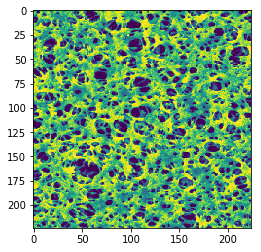

In [52]:
import numpy as np
from keras.preprocessing import image
test_path = r'C:\Users\aman0\Desktop\ME\Tutorial\Data Sink\TransferF_course\validation_data\test.jpg'
img = image.load_img(test_path, target_size=(224,224,3))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
preds_My_model = My_model.predict(x)
print (preds_My_model.max())

map_dict = {'HotTear_or_ColdLap':0,'Porosity':1} #,'Cat':2,'cngAutoRickshaw':3,'Dog':4,'Horse':5
rev_map = dict(map(reversed, map_dict.items()))

preds_My_model_ans = pd.Series([preds_My_model.argmax()]).map(rev_map)[0]

plt.imshow(x[...,0][0])
preds_My_model_ans